In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class MultiArmedBandit:
    def __init__(self, n_arms=10):
        self.n_arms = n_arms
        self.true_values = np.random.normal(0, 1, n_arms)
        self.optimal_action = np.argmax(self.true_values)

    def get_reward(self, action):
        return np.random.normal(self.true_values[action], 1.0)

In [3]:
def simulate(n_arms, epsilon, steps, runs):
    """
    n_arms: how many machines
    epsilon: exploration probability
    steps: 2000 steps per run
    runs: 2000 runs
    """
    avg_rewards = np.zeros(steps)
    optimal_action_counts = np.zeros(steps)

    for r in range(runs):
        bandit = MultiArmedBandit(n_arms)
        q_estimates = np.zeros(n_arms)
        action_counts = np.zeros(n_arms)

        for s in range(steps):
            # e-greedy
            if np.random.random() < epsilon:
                action = np.random.randint(n_arms) #Exploration
            else:
                #Exploitation
                action = np.random.choice(np.where(q_estimates == np.max(q_estimates))[0])

            reward = bandit.get_reward(action)
            action_counts[action] += 1
            q_estimates[action] += (reward - q_estimates[action]) / action_counts[action]

            avg_rewards[s] += reward
            if action == bandit.optimal_action:
                optimal_action_counts[s] += 1
        if (r + 1) % 500 == 0:
            print(f"Epsilon {epsilon}:  {r + 1}/{runs}")

    return avg_rewards / runs, (optimal_action_counts / runs) * 100

epsilon = 0
Epsilon 0:  500/2000
Epsilon 0:  1000/2000
Epsilon 0:  1500/2000
Epsilon 0:  2000/2000
epsilon = 0.01
Epsilon 0.01:  500/2000
Epsilon 0.01:  1000/2000
Epsilon 0.01:  1500/2000
Epsilon 0.01:  2000/2000
epsilon = 0.1
Epsilon 0.1:  500/2000
Epsilon 0.1:  1000/2000
Epsilon 0.1:  1500/2000
Epsilon 0.1:  2000/2000


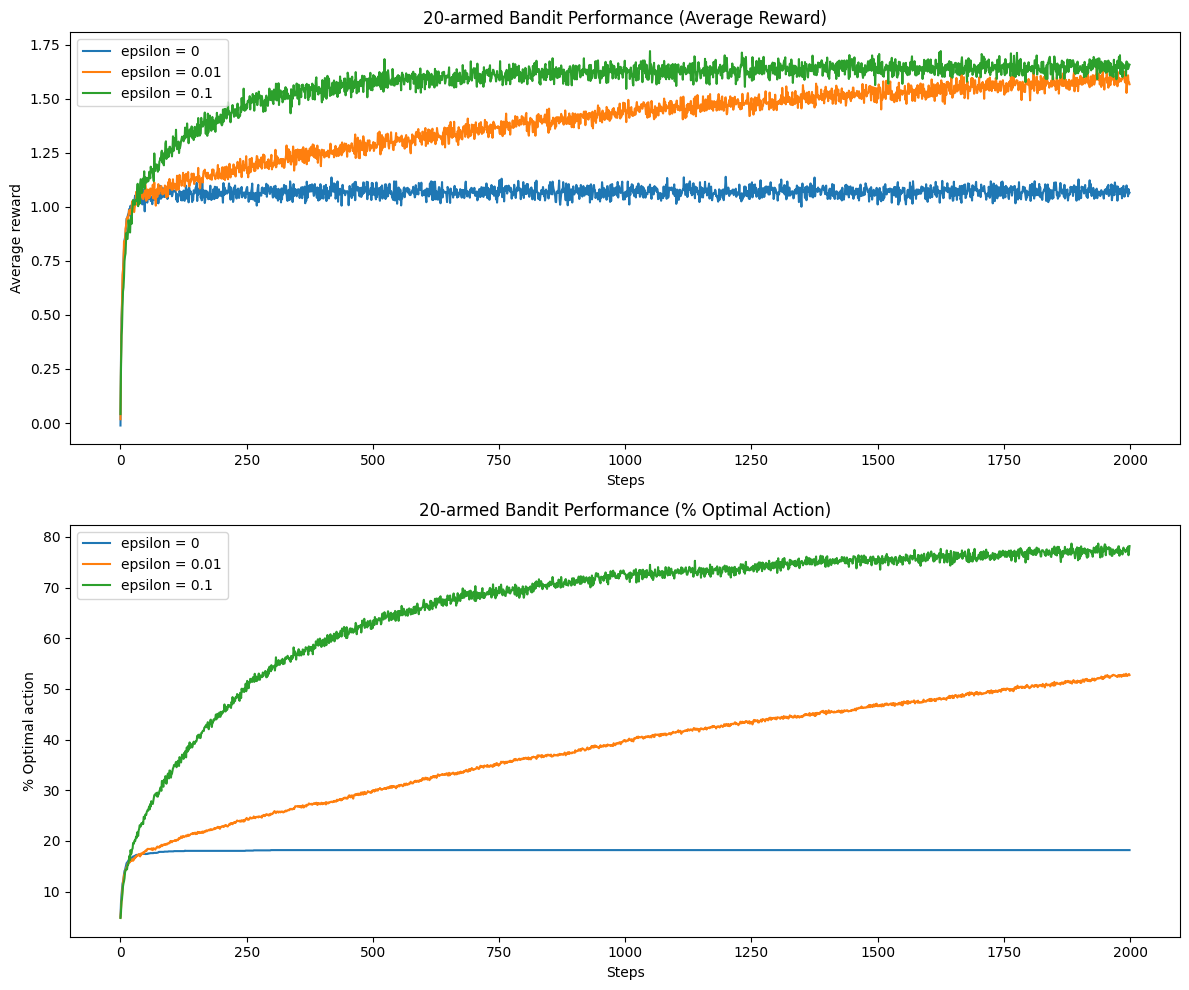

In [4]:
# Plot
n_arms = 20
steps = 2000
runs = 2000

epsilons = [0, 0.01, 0.1]
results = {}

for eps in epsilons:
    print(f"epsilon = {eps}")
    results[eps] = simulate(n_arms, eps, steps, runs)

plt.figure(figsize=(12, 10))

# Average Reward
plt.subplot(2, 1, 1)
for eps in epsilons:
    plt.plot(results[eps][0], label=f'epsilon = {eps}')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.title(f'{n_arms}-armed Bandit Performance (Average Reward)')
plt.legend()

# Optimal Action
plt.subplot(2, 1, 2)
for eps in epsilons:
    plt.plot(results[eps][1], label=f'epsilon = {eps}')
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.title(f'{n_arms}-armed Bandit Performance (% Optimal Action)')
plt.legend()

plt.tight_layout()
plt.show()